In [8]:
import ugradio
import astropy.units as u
from astropy.coordinates import SkyCoord, AltAz, EarthLocation
from astropy.coordinates import Galactic
import logging
import time
import numpy as np
import math
from ugradio import leo
import astropy as astropy
from astropy.coordinates import SkyCoord                         # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5         # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude       # Angles
from astropy.time import Time


No module named 'rtlsdr'


In [9]:
# Galactic coordinates (l, b) of the object
galactic_coords = SkyCoord(l=120*u.deg, b=0*u.deg, frame='galactic')

# Observing location (latitude, longitude, elevation)
observing_location = EarthLocation(lat=leo.lat*u.deg, lon=-leo.lon*u.deg, height=leo.alt*u.m)

# Time of observation
obs_time = astropy.time.Time(time.time(), format='unix')

# Convert to AltAz frame
altaz_coords = galactic_coords.transform_to(AltAz(obstime=obs_time, location=observing_location))

# Extract altitude and azimuth
altitude = altaz_coords.alt
azimuth = altaz_coords.az

print(f"Altitude: {altitude}")
print(f"Azimuth: {azimuth}")

Altitude: 26.74938997821453 deg
Azimuth: 330.5232264096934 deg


In [10]:
import numpy as np

In [11]:
glons = np.arange(60, 180, 4.6)
glats = np.arange(20, 60, 3.4) 
pointings = np.array([(L,B) for L in glons for B in glats])

In [12]:
pointings[1]

array([60. , 23.4])

In [13]:
from astropy.coordinates import ICRS

In [39]:
pointings[2]

array([60. , 26.8])

In [63]:
ra_dec_gal_coords = []
for i in range(len(pointings)): 
    galactic_coords = pointings[i]
    coords = SkyCoord(l=galactic_coords[0]*u.deg, b=galactic_coords[1]*u.deg, frame='galactic')
    icrs_coords = coords.transform_to(ICRS())
    ra_dec_gal_coords.append([[galactic_coords], [icrs_coords.ra.deg, icrs_coords.dec.deg]])



In [169]:
ra_dec_gal_coords_2 = []

for i in range(len(pointings)): 
    galactic_coords = pointings[i]
    coords = SkyCoord(l=galactic_coords[0]*u.deg, b=galactic_coords[1]*u.deg, frame='galactic')
    icrs_coords = coords.transform_to(ICRS())
    
    # Append the data in the desired format
    ra_dec_gal_coords_2.append([
        galactic_coords[0],  # galactic_l
        galactic_coords[1],  # galactic_b
        icrs_coords.ra.deg,  # ra
        icrs_coords.dec.deg  # dec
    ])



In [170]:
pointings

array([[ 60. ,  20. ],
       [ 60. ,  23.4],
       [ 60. ,  26.8],
       [ 60. ,  30.2],
       [ 60. ,  33.6],
       [ 60. ,  37. ],
       [ 60. ,  40.4],
       [ 60. ,  43.8],
       [ 60. ,  47.2],
       [ 60. ,  50.6],
       [ 60. ,  54. ],
       [ 60. ,  57.4],
       [ 64.6,  20. ],
       [ 64.6,  23.4],
       [ 64.6,  26.8],
       [ 64.6,  30.2],
       [ 64.6,  33.6],
       [ 64.6,  37. ],
       [ 64.6,  40.4],
       [ 64.6,  43.8],
       [ 64.6,  47.2],
       [ 64.6,  50.6],
       [ 64.6,  54. ],
       [ 64.6,  57.4],
       [ 69.2,  20. ],
       [ 69.2,  23.4],
       [ 69.2,  26.8],
       [ 69.2,  30.2],
       [ 69.2,  33.6],
       [ 69.2,  37. ],
       [ 69.2,  40.4],
       [ 69.2,  43.8],
       [ 69.2,  47.2],
       [ 69.2,  50.6],
       [ 69.2,  54. ],
       [ 69.2,  57.4],
       [ 73.8,  20. ],
       [ 73.8,  23.4],
       [ 73.8,  26.8],
       [ 73.8,  30.2],
       [ 73.8,  33.6],
       [ 73.8,  37. ],
       [ 73.8,  40.4],
       [ 73

In [171]:
ra_dec_gal_coords_2 = np.array(ra_dec_gal_coords_2)

In [172]:
ra_dec_gal_coords_2.shape

(324, 4)

In [112]:
ra_dec_gal_coords_2[:,0]

array([ 60. ,  60. ,  60. ,  60. ,  60. ,  60. ,  60. ,  60. ,  60. ,
        60. ,  60. ,  60. ,  64.6,  64.6,  64.6,  64.6,  64.6,  64.6,
        64.6,  64.6,  64.6,  64.6,  64.6,  64.6,  69.2,  69.2,  69.2,
        69.2,  69.2,  69.2,  69.2,  69.2,  69.2,  69.2,  69.2,  69.2,
        73.8,  73.8,  73.8,  73.8,  73.8,  73.8,  73.8,  73.8,  73.8,
        73.8,  73.8,  73.8,  78.4,  78.4,  78.4,  78.4,  78.4,  78.4,
        78.4,  78.4,  78.4,  78.4,  78.4,  78.4,  83. ,  83. ,  83. ,
        83. ,  83. ,  83. ,  83. ,  83. ,  83. ,  83. ,  83. ,  83. ,
        87.6,  87.6,  87.6,  87.6,  87.6,  87.6,  87.6,  87.6,  87.6,
        87.6,  87.6,  87.6,  92.2,  92.2,  92.2,  92.2,  92.2,  92.2,
        92.2,  92.2,  92.2,  92.2,  92.2,  92.2,  96.8,  96.8,  96.8,
        96.8,  96.8,  96.8,  96.8,  96.8,  96.8,  96.8,  96.8,  96.8,
       101.4, 101.4, 101.4, 101.4, 101.4, 101.4, 101.4, 101.4, 101.4,
       101.4, 101.4, 101.4, 106. , 106. , 106. , 106. , 106. , 106. ,
       106. , 106. ,

In [113]:
import pandas as pd

In [173]:
ra_dec_gal_coords_2[5]

array([ 60.        ,  37.        , 255.37913878,  36.71647848])

In [181]:
gal_ra_dec_dict = {
    'L': ra_dec_gal_coords_2[:,0], 
    'B': ra_dec_gal_coords_2[:,1],
    'RA': ra_dec_gal_coords_2[:,2], 
    'DEC': ra_dec_gal_coords_2[:,3]}



In [182]:
gal_ra_dec = pd.DataFrame(gal_ra_dec_dict)

In [183]:
gal_ra_dec

,L,B,RA,DEC
0,60.0,20.0,275.409947,32.447046
1,60.0,23.4,271.577758,33.557436
2,60.0,26.8,267.651327,34.546815
3,60.0,30.2,263.636683,35.407642
4,60.0,33.6,259.542312,36.132935
...,...,...,...,...
319,179.6,43.8,138.674248,41.957130
320,179.6,47.2,143.238572,41.823769
321,179.6,50.6,147.771223,41.510818
322,179.6,54.0,152.248135,41.021947


In [184]:
ra_sorted = gal_ra_dec.sort_values('RA', ascending=True)

In [185]:
ra_sorted.reset_index(inplace=True)

In [192]:
ra_sorted['Galactic_Index'] = ra_sorted['index']

In [198]:
ra_sorted = ra_sorted.drop(columns='index')

In [199]:
ra_sorted

,L,B,RA,DEC,Galactic_Index
0,124.4,20.0,23.851192,82.746098,168
1,124.4,23.4,32.778248,86.042542,169
2,129.0,20.0,52.084066,80.962227,180
3,133.6,20.0,69.006710,77.908980,192
4,129.0,23.4,69.993942,83.367395,181
...,...,...,...,...,...
319,115.2,23.4,309.232324,82.078465,145
320,110.6,20.0,312.501293,76.649154,132
321,115.2,20.0,326.412516,79.953801,144
322,119.8,23.4,334.954938,85.318438,157


In [214]:
ra_sorted.loc[1]

L                 124.400000
B                  23.400000
RA                 32.778248
DEC                86.042542
Galactic_Index    169.000000
Name: 1, dtype: float64

In [216]:
ra_sorted.loc[1][0]

124.39999999999992

In [200]:
ra_sorted.to_csv('RA_Sorted.csv')

In [134]:
pointings

array([[ 60. ,  20. ],
       [ 60. ,  23.4],
       [ 60. ,  26.8],
       [ 60. ,  30.2],
       [ 60. ,  33.6],
       [ 60. ,  37. ],
       [ 60. ,  40.4],
       [ 60. ,  43.8],
       [ 60. ,  47.2],
       [ 60. ,  50.6],
       [ 60. ,  54. ],
       [ 60. ,  57.4],
       [ 64.6,  20. ],
       [ 64.6,  23.4],
       [ 64.6,  26.8],
       [ 64.6,  30.2],
       [ 64.6,  33.6],
       [ 64.6,  37. ],
       [ 64.6,  40.4],
       [ 64.6,  43.8],
       [ 64.6,  47.2],
       [ 64.6,  50.6],
       [ 64.6,  54. ],
       [ 64.6,  57.4],
       [ 69.2,  20. ],
       [ 69.2,  23.4],
       [ 69.2,  26.8],
       [ 69.2,  30.2],
       [ 69.2,  33.6],
       [ 69.2,  37. ],
       [ 69.2,  40.4],
       [ 69.2,  43.8],
       [ 69.2,  47.2],
       [ 69.2,  50.6],
       [ 69.2,  54. ],
       [ 69.2,  57.4],
       [ 73.8,  20. ],
       [ 73.8,  23.4],
       [ 73.8,  26.8],
       [ 73.8,  30.2],
       [ 73.8,  33.6],
       [ 73.8,  37. ],
       [ 73.8,  40.4],
       [ 73

In [142]:

for i in range(len(ra_sorted)): 
    galactic_coords = np.array([ra_sorted.loc[i][0], ra_sorted.loc[i][1]])
    coords = SkyCoord(l=galactic_coords[0]*u.deg, b=galactic_coords[1]*u.deg, frame='galactic')
    observing_location = EarthLocation(lat=leo.lat*u.deg, lon=-leo.lon*u.deg, height=leo.alt*u.m)
    observation_time = astropy.time.Time(time.time(), format = 'unix')
    altaz = coords.transform_to(AltAz(obstime=observation_time, location=observing_location))
    
    
    # Calculate time offset from the start of the night (in hours)
max_altitude_time_offset = altaz.alt.degree * u.hour

In [215]:
# Define the specific RA and Dec coordinate (in degrees)
ra = 32.778248
dec = 86.042542

# Define the start and end time for the calculation
time_start = Time('2024-04-18T00:00:00', scale='utc')
time_end = Time('2024-04-20T00:00:00', scale='utc')

# Create a list to store the times when RA and Dec are above the horizon
times_above_horizon = []

# Iterate over the time from start to end in steps of 1 hour
for time_step in np.arange(0, (time_end - time_start).to_value(u.hour), 1):
    
    observing_location = EarthLocation(lat=leo.lat*u.deg, lon=-leo.lon*u.deg, height=leo.alt*u.m)
    # Calculate the time for the current step
    current_time = time_start + time_step * u.hour
    
    # Create a SkyCoord object for the specific RA and Dec
    coords = SkyCoord(ra=ra, dec=dec, unit='deg', frame='icrs')
    
    # Calculate AltAz coordinates for the current time and location
    altaz = coords.transform_to(AltAz(obstime=current_time, location=observing_location))
    
    # Check if the altitude of RA and Dec is above zero
    if altaz.alt.deg > 0:
        times_above_horizon.append(current_time.to_datetime())

# Print the times when RA and Dec are above the horizon
for time in times_above_horizon:
    print(f"RA: {ra}, Dec: {dec}, Time (UTC): {time}")

RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 00:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 01:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 02:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 03:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 04:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 05:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 06:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 07:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 08:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 09:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 10:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 11:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 12:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 13:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 14:00:00
RA: 32.778248, Dec: 86.042542, Time (UTC): 2024-04-18 1

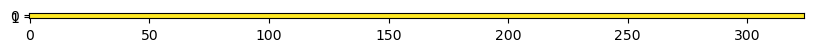

In [127]:
plt.figure(figsize=(10,5))
plt.imshow((gal_ra_dec_dict['L'], gal_ra_dec_dict['B']), vmin=0, vmax=1)

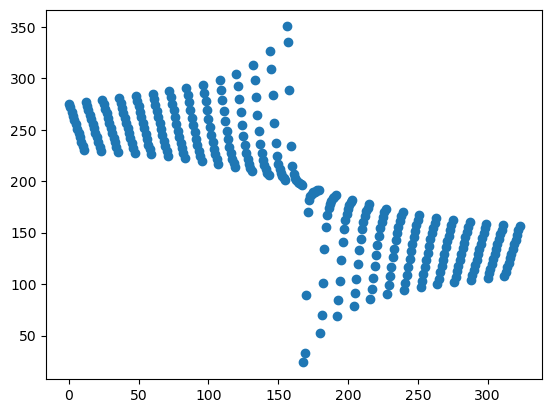

In [139]:
plt.scatter(range(len(gal_ra_dec)), (gal_ra_dec['RA']))
#plt.plot(gal_ra_dec['L'], gal_ra_dec['B'])

In [68]:
ra_dec_gal_coords

[[[array([60., 20.])], [275.4099465006669, 32.44704573697857]],
 [[array([60. , 23.4])], [271.57775804742187, 33.55743568956647]],
 [[array([60. , 26.8])], [267.65132671741213, 34.546814588456684]],
 [[array([60. , 30.2])], [263.6366826665167, 35.407641930429385]],
 [[array([60. , 33.6])], [259.5423120404737, 36.13293452571155]],
 [[array([60., 37.])], [255.37913877895232, 36.716478476806486]],
 [[array([60. , 40.4])], [251.16036251726064, 37.15303984043927]],
 [[array([60. , 43.8])], [246.9011415541328, 37.438558605176524]],
 [[array([60. , 47.2])], [242.61812746349955, 37.57030979885039]],
 [[array([60. , 50.6])], [238.32887768577496, 37.547016913593694]],
 [[array([60., 54.])], [234.05119045539215, 37.368906516953736]],
 [[array([60. , 57.4])], [229.80241862952712, 37.03769848983667]],
 [[array([64.6, 20. ])], [277.1869841999899, 36.513989899030676]],
 [[array([64.6, 23.4])], [273.1424702704984, 37.58271117219223]],
 [[array([64.6, 26.8])], [268.988149184952, 38.50961825161651]],
 [